In [1]:
import pandas as pd

xls = pd.ExcelFile('companies_new.xlsx')
sheets = xls.sheet_names
sheet_to_df_map = {}
for sheet in sheets:
    sheet_to_df_map[sheet] = xls.parse(sheet)

df = pd.concat(sheet_to_df_map.values(), ignore_index=True)

In [2]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [3]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [4]:
df['COMP'].value_counts()

UNILEVER            1135
BMW                 1127
LUFTHANSA           1127
ZALANDO             1127
DELIVERY HERO       1127
DEUTSCHEBANK        1127
VOLKSWAGEN          1127
HENKEL              1127
HELLOFRESH          1117
SAP                 1116
ALLIANZ             1116
HUGO BOSS           1116
DEUTSCHE TELEKOM    1116
SIEMENS              992
BASF                 886
Name: COMP, dtype: int64

In [5]:
news = pd.read_csv('news_data.csv')

In [6]:
news = news[['just_date', 'message', 'COMP']].rename({'just_date': 'Date'}, axis = 'columns')

In [7]:
news['Date'] = news['Date'].astype('datetime64[ns]')

In [8]:
def func(x):
    res = x.upper() 
    if res == 'ZAL':
        return 'ZALANDO'
    else:
        return res

In [9]:
news['COMP'] = news['COMP'].apply(lambda x: func(x))

In [10]:
result = pd.merge(df, news, how="left", on=["COMP", "Date"])

In [11]:
result.message.notna().sum()

3661

In [12]:
result

,COMP,Date,Open,High,Low,Close,Volume,message
0,ALLIANZ,2019-02-22,79.96,81.35,79.80,81.23,423912,NaN
1,ALLIANZ,2019-02-25,81.76,82.67,81.72,82.41,540216,NaN
2,ALLIANZ,2019-02-26,82.25,83.16,82.16,82.68,327024,kurz vor dem gipfeltreffen: alle blicke sind a...
3,ALLIANZ,2019-02-27,82.43,83.53,82.07,83.27,366054,NaN
4,ALLIANZ,2019-02-28,82.05,82.06,81.07,81.81,519239,kommentar: die allianz der erzrivalen daimler ...
...,...,...,...,...,...,...,...,...
17655,ZALANDO,2023-07-24,30.75,31.25,30.28,30.82,1002680,NaN
17656,ZALANDO,2023-07-25,30.75,31.58,30.75,31.35,1146526,NaN
17657,ZALANDO,2023-07-26,31.05,31.85,30.45,30.72,825826,NaN
17658,ZALANDO,2023-07-27,30.45,32.17,30.45,31.35,980111,NaN


In [13]:
result.to_csv('final.csv')

In [14]:
result['COMP'].value_counts()

VOLKSWAGEN          1542
LUFTHANSA           1453
DEUTSCHEBANK        1357
ALLIANZ             1169
BMW                 1147
UNILEVER            1139
ZALANDO             1133
HENKEL              1133
DEUTSCHE TELEKOM    1131
DELIVERY HERO       1129
SAP                 1122
HELLOFRESH          1118
HUGO BOSS           1116
SIEMENS             1071
BASF                 900
Name: COMP, dtype: int64

## Sentiments from german Bert

In [15]:
pip install germansentiment

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [16]:
from germansentiment import SentimentModel

model = SentimentModel()

In [17]:
def sent(x):
    try:
        res = model.predict_sentiment(x)
    except:
        res = 0
    return res

In [18]:
##result['sentiment'] = result['message'].apply(lambda x: sent(x))

In [21]:
import numpy as np

In [22]:
result['index'] = result.index

In [28]:
indexes = np.array(result[result['message'].notna()]['index'])
texts = np.array(result[result['message'].notna()]['message'])

In [29]:
texts

array(['kurz vor dem gipfeltreffen: alle blicke sind auf vietnam gerichtet\n#kimjongun #peteraltmaier #donaldtrump #joekaeser #horstgeicke #siemens #isin_de0007236101\n\ndas gipfeltreffen zwischen trump und kim rückt das land ins scheinwerferlicht. die deutschen haben erkannt, wie wichtig der standort ist. berlin und brüssel schmieden allianzen mit den kommunisten in hanoi.\n\nteilen 👉 @dernewsbot faz444',
       'kommentar: die allianz der erzrivalen daimler und bmw ist richtig\n#daimler #bmw\n\ndie deutschen luxuswagenhersteller wollen gemeinsam das roboterauto entwickeln. das ist gut – nicht nur, weil zur konkurrenz auch google gehört. ein kommentar.\n\nteilen 👉 @dernewsbot faz663',
       'kommentar: die allianz der erzrivalen daimler und bmw ist richtig\n\ndie deutschen luxuswagenhersteller wollen gemeinsam das roboterauto entwickeln. das ist gut – nicht nur, weil zur konkurrenz auch google gehört. ein kommentar.\n\nteilen 👉 @dernewsbot faz656',
       ...,
       "\u200b\u200b\u2

In [30]:
import time

In [31]:

start_time = time.time()

result_list = model.predict_sentiment(texts)

end_time = time.time()

execution_time = end_time - start_time


# Print the execution time
print(f"Execution time: {execution_time} seconds")

Execution time: 3370.991641998291 seconds


In [37]:
len(indexes)

3661

In [46]:
np.vstack((indexes, np.array(result_list))).T

array(['2', '4', '5', ..., 'neutral', 'neutral', 'negative'], dtype='<U21')

In [50]:
df2 = pd.DataFrame(np.vstack((indexes, np.array(result_list))).T, columns = ['index', 'sentiment'])

In [51]:
df2

,index,sentiment
0,2,neutral
1,4,neutral
2,5,positive
3,6,neutral
4,7,negative
...,...,...
3656,17558,neutral
3657,17559,neutral
3658,17590,neutral
3659,17602,neutral


In [57]:
df2['index'] = df2['index'].astype('int64')

In [58]:
df_final = pd.merge(result, df2, how="left", on=["index"])

In [60]:
df_final.to_csv('with_sentiments.csv')

In [61]:
df_final['sentiment'].value_counts()

neutral     3331
negative     317
positive      13
Name: sentiment, dtype: int64

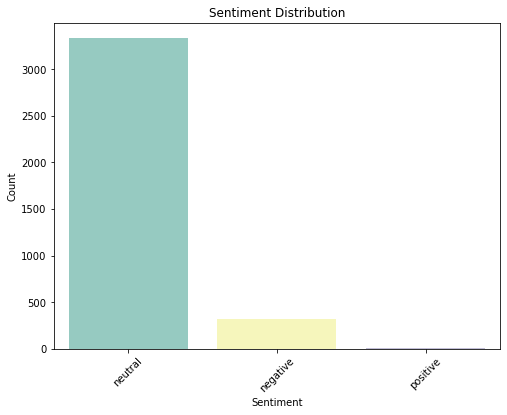

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have df_final with the 'sentiment' column

# Get the value counts of 'sentiment'
sentiment_counts = df_final['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set3")
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


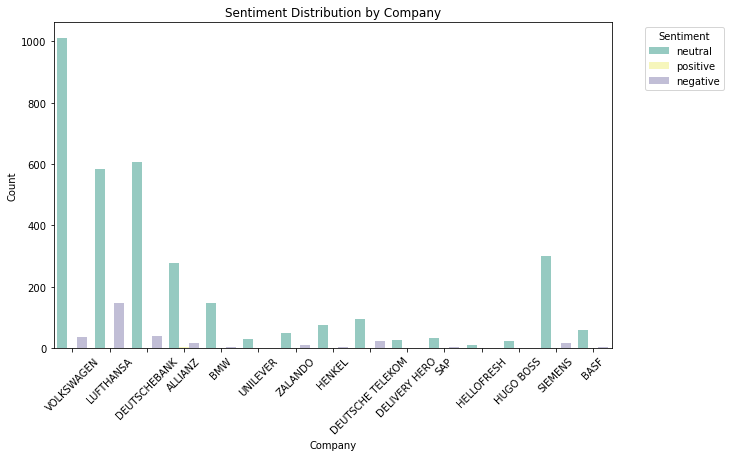

In [65]:
order = df_final['COMP'].value_counts().index

plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.countplot(data=df_final, x='COMP', hue='sentiment', palette='Set3', order = order)
plt.title('Sentiment Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()





## so the predictions for the companies with huge amount of negative news may actually be better than without sentimental analysis

In [67]:
df_final.sentiment.value_counts()

neutral     3331
negative     317
positive      13
Name: sentiment, dtype: int64

In [66]:
df_final

,COMP,Date,Open,High,Low,Close,Volume,message,index,sentiment
0,ALLIANZ,2019-02-22,79.96,81.35,79.80,81.23,423912,NaN,0,NaN
1,ALLIANZ,2019-02-25,81.76,82.67,81.72,82.41,540216,NaN,1,NaN
2,ALLIANZ,2019-02-26,82.25,83.16,82.16,82.68,327024,kurz vor dem gipfeltreffen: alle blicke sind a...,2,neutral
3,ALLIANZ,2019-02-27,82.43,83.53,82.07,83.27,366054,NaN,3,NaN
4,ALLIANZ,2019-02-28,82.05,82.06,81.07,81.81,519239,kommentar: die allianz der erzrivalen daimler ...,4,neutral
...,...,...,...,...,...,...,...,...,...,...
17655,ZALANDO,2023-07-24,30.75,31.25,30.28,30.82,1002680,NaN,17655,NaN
17656,ZALANDO,2023-07-25,30.75,31.58,30.75,31.35,1146526,NaN,17656,NaN
17657,ZALANDO,2023-07-26,31.05,31.85,30.45,30.72,825826,NaN,17657,NaN
17658,ZALANDO,2023-07-27,30.45,32.17,30.45,31.35,980111,NaN,17658,NaN


In [68]:
def sentiment(l):
    if l == 'neutral':
        return 0
    elif l == 'negative':
        return -1
    elif l == 'positive':
        return 1
    else:
        return l

In [118]:
df_final_1 = df_final.copy()

df_final_1['sentiment'] = df_final_1['sentiment'].apply(lambda x: sentiment(x))

Here we create a target variable y_1 - a price in the next day

In [119]:
df_final_1['avg_price'] = ((df_final_1['Open'] + df_final_1['Close'] + df_final_1['High'] + df_final_1['Low'])/4)
#result['target_1'] = result['<OPEN>'].shift(-1)
df_final_1['target_1'] = df_final_1['avg_price'].shift(-1)
df_final_1['ticker shift'] = df_final_1['COMP'].shift(-1)
df_final_1.loc[df_final_1['COMP'] == df_final_1['ticker shift'], 'y_2'] = df_final_1['target_1']
df_final_1.loc[df_final_1['COMP'] != df_final_1['ticker shift'], 'y_2'] = None

In [121]:
df_final_1['y_1'] = np.sign(df_final_1['y_1'] - df_final_1['avg_price'] )

## here we do a model

In [75]:
import os
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 200)
#messages = pd.read_csv('news.csv')
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")
import nltk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier
import mlxtend
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import numpy as np   
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.dummy import DummyClassifier

In [123]:
data = df_final_1.copy()
Y = data['y_1']
data = data[['COMP', 'Date', 'Open', 'sentiment']]

In [124]:
corr_matr = data.corrwith(Y)
corr_matr = corr_matr.to_dict()
tab = {'indicator': list(corr_matr.keys()) , 'value': list(corr_matr.values())}
tabl = pd.DataFrame(tab, columns = ['indicator','value'])
tabl = tabl.sort_values(by=['value'])

In [125]:
tabl

,indicator,value
1,sentiment,-0.010631
0,Open,-0.008586


In [163]:
def create_features(df, label=None):
    #df['date'] = df.index
    df['day'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    #df['movingavg4weeks'] = round(df['<CLOSE>'].rolling(window=(4*5), min_periods = 1).mean().shift(),2)
    #df['movingavg16weeks'] = round(df['<CLOSE>'].rolling(window=(16*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 4 weeks 
    #df['movingavg28weeks'] = round(df['<CLOSE>'].rolling(window=(28*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 16 weeks
    #df['movingavg40weeks'] = round(df['<CLOSE>'].rolling(window=(40*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 28 weeks
    #df['movingavg52weeks'] = round(df['<CLOSE>'].rolling(window=(52*5), min_periods = 1).mean().shift(),2)  #add 12 weeks to 40 weeks
    #df['window1days'] = round(df['<CLOSE>'].rolling(window = 1, min_periods = 1).mean().shift(),2)  
    #df['window2days'] = round(df['<CLOSE>'].rolling(window = 2, min_periods = 1).mean().shift(),2)
    #df['window3days'] = round(df['<CLOSE>'].rolling(window = 3, min_periods = 1).mean().shift(),2)  
    #df['window4days'] = round(df['<CLOSE>'].rolling(window = 4, min_periods = 1).mean().shift(),2)
    #df['window10days'] = round(df['<CLOSE>'].rolling(window = 10, min_periods = 1).mean().shift(),2)  
    #df['window50days'] = round(df['<CLOSE>'].rolling(window = 50, min_periods = 1).mean().shift(),2)
    #df['price'] = round((df['<HIGH>'] + df['<LOW>'] + df['<CLOSE>']) / 3 , 2)
    df['delta'] = (df['Close']+df['Open']+df['High']+df['Low'])/4 - (df['Close'].shift(1)
                                                                            +df['Open'].shift(1)
                                                                            +df['High'].shift(1)
                                                                            +df['Low'].shift(1))

In [200]:
ticker_list = ['LUFTHANSA', 'SIEMENS', 'VOLKSWAGEN','ALLIANZ', 'DEUTSCHE TELEKOM', 'DEUTSCHEBANK']
#ticker_list = list(res['<TICKER>'].unique())
company = []
period = []
train = []
test = []
model = []
f1 = []

In [201]:

df_final_1.dropna()

,COMP,Date,Open,High,Low,Close,Volume,message,index,sentiment,avg_price,target_1,ticker shift,y_1
2,ALLIANZ,2019-02-26,82.25,83.16,82.16,82.68,327024,kurz vor dem gipfeltreffen: alle blicke sind a...,2,0.0,82.5625,82.8250,ALLIANZ,1.0
4,ALLIANZ,2019-02-28,82.05,82.06,81.07,81.81,519239,kommentar: die allianz der erzrivalen daimler ...,4,0.0,81.7475,81.7475,ALLIANZ,0.0
5,ALLIANZ,2019-02-28,82.05,82.06,81.07,81.81,519239,kommentar: die allianz der erzrivalen daimler ...,5,1.0,81.7475,81.7475,ALLIANZ,0.0
6,ALLIANZ,2019-02-28,82.05,82.06,81.07,81.81,519239,bmw und daimler wollen roboterauto-allianz sch...,6,0.0,81.7475,81.7475,ALLIANZ,0.0
7,ALLIANZ,2019-02-28,82.05,82.06,81.07,81.81,519239,http://www.tagesschau.de/inland/bmw-daimler-al...,7,-1.0,81.7475,82.7200,ALLIANZ,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17558,ZALANDO,2023-03-06,38.84,39.33,38.16,39.12,898418,​​​​​schuhe für 400 euro: wie kommt die berlin...,17558,0.0,38.8625,38.8650,ZALANDO,1.0
17559,ZALANDO,2023-03-07,39.12,41.47,37.07,37.80,2351442,​​​​​internet oder innenstadt? die ungewisse z...,17559,0.0,38.8650,37.4775,ZALANDO,-1.0
17590,ZALANDO,2023-04-21,37.09,37.45,36.56,37.45,786708,​​​​​ex-chefs rorsted und diess führen dax-ver...,17590,0.0,37.1375,37.0500,ZALANDO,-1.0
17602,ZALANDO,2023-05-10,31.73,31.94,31.24,31.36,728662,​​​​​der aufstieg und fall des ostdeutschen on...,17602,0.0,31.5675,31.6950,ZALANDO,1.0


In [221]:
def scores(how):

    for ticker in ticker_list: 
        YNDX = df_final_1[df_final_1['COMP'] == ticker]
        YNDX = YNDX[['COMP', 'Open', 'High', 'Low', 'Close','Date', 'y_1', 'sentiment']]
        YNDX = YNDX.groupby(['COMP','Open', 'High', 'Low', 'Close','Date','y_1'])['sentiment'].apply(lambda x: sum(x)).reset_index()
        YNDX.sort_values(by = 'Date', axis=0, ascending=True, inplace=True)
        YNDX = YNDX.set_index(pd.DatetimeIndex(YNDX['Date']))
        create_features(YNDX)
        #pd.get_dummies(YNDX, columns=['<TICKER>'])
        YNDX = YNDX.drop(labels=['Date'], axis=1)
        YNDX = YNDX.dropna()
        Y_1 = YNDX['y_1']
        YNDX = YNDX.drop(labels=['COMP', 'y_1'], axis=1)
        X = YNDX
        split = int(len(X)*0.7)
        X_train, X_test = YNDX.iloc[:split, :], YNDX.iloc[split:, :]
        y_train_1, y_test_1 = Y_1.iloc[:split], Y_1.iloc[split:]
        
        res_1 = YNDX.dropna()

        print('Обучается '+ticker)

        
        X_data_train = X_train
        X_data_test  = X_test
        
        X_tr = np.array(X_data_train)
        y_tr_1 = np.array(y_train_1)

        clf1 = RandomForestClassifier()
        clf3 = RidgeClassifier()
        labels = ['Logistic Regression', 'Ridge']
        
        if how == 'report':
        

            models = [clf1, clf3]
            print('------------------------'+'1 day'+'------------------------')
            for clf, lab in zip(models, labels):
                clf.fit(X_data_train, y_train_1)
                print('------------------------'+ticker+'------------------------')
                print('------------------------'+lab+'------------------------')
                y_test_pred = clf.predict(X_data_test)
                arg_test = {'y_true':y_test_1, 'y_pred':y_test_pred}
                print(confusion_matrix(**arg_test))
                print(classification_report(**arg_test))

                
        elif how == 'table':

            # делаем таблицу
            for clf, lab in zip([clf1, clf3],
                                 labels):

                company.append(ticker)
                period.append('1 day')
                model.append(lab)
                y_predicted_test = clf.fit(X_data_train, y_train_1).predict(X_data_test)
                test.append(np.mean(y_test_1==y_predicted_test))
                f1.append(f1_score(y_test_1, y_predicted_test,
                                                                        average = 'weighted'))
                y_predicted_train = clf.fit(X_data_train, y_train_1).predict(X_data_train)
                train.append(np.mean(y_train_1==y_predicted_train))
                
           
                
            tab = {'f1_score':f1, 'company': company, 'period': period,'model': model, 'Train': train , 'Test': test}
            tabl = pd.DataFrame(tab, columns = ['company', 'period', 'model','Train', 'Test', 'f1_score'])
        else: 
            return 'error'
    if how == 'table':
        return tabl

In [222]:

report = scores(how = 'table')

Обучается LUFTHANSA
Обучается SIEMENS
Обучается VOLKSWAGEN
Обучается ALLIANZ
Обучается DEUTSCHE TELEKOM
Обучается DEUTSCHEBANK


In [223]:
report

,company,period,model,Train,Test,f1_score
0,LUFTHANSA,1 day,Logistic Regression,1.000000,0.341040,0.322157
1,LUFTHANSA,1 day,Ridge,0.543424,0.398844,0.324857
2,SIEMENS,1 day,Logistic Regression,0.983696,0.462500,0.478090
3,SIEMENS,1 day,Ridge,0.467391,0.325000,0.301672
4,VOLKSWAGEN,1 day,Logistic Regression,0.998418,0.394834,0.366716
5,VOLKSWAGEN,1 day,Ridge,0.496835,0.409594,0.295500
6,ALLIANZ,1 day,Logistic Regression,1.000000,0.413793,0.382243
7,ALLIANZ,1 day,Ridge,0.536946,0.517241,0.474102
8,DEUTSCHE TELEKOM,1 day,Logistic Regression,1.000000,0.500000,0.486002
9,DEUTSCHE TELEKOM,1 day,Ridge,0.698795,0.611111,0.575926


In [224]:
def scores_without_texts(how):

    for ticker in ticker_list: 
        YNDX = df_final_1[df_final_1['COMP'] == ticker]
        YNDX = YNDX[['COMP', 'Open', 'High', 'Low', 'Close','Date', 'y_1', 'sentiment']]
        YNDX = YNDX.groupby(['COMP','Open', 'High', 'Low', 'Close','Date','y_1'])['sentiment'].apply(lambda x: sum(x)).reset_index()
        YNDX.sort_values(by = 'Date', axis=0, ascending=True, inplace=True)
        YNDX = YNDX.set_index(pd.DatetimeIndex(YNDX['Date']))
        create_features(YNDX)
        #pd.get_dummies(YNDX, columns=['<TICKER>'])
        YNDX = YNDX.drop(labels=['Date'], axis=1)
        YNDX = YNDX.dropna()
        Y_1 = YNDX['y_1']
        YNDX = YNDX.drop(labels=['COMP', 'y_1', 'sentiment'], axis=1)
        X = YNDX
        split = int(len(X)*0.7)
        X_train, X_test = YNDX.iloc[:split, :], YNDX.iloc[split:, :]
        y_train_1, y_test_1 = Y_1.iloc[:split], Y_1.iloc[split:]
        
        res_1 = YNDX.dropna()

        print('Обучается '+ticker)

        
        X_data_train = X_train
        X_data_test  = X_test
        
        X_tr = np.array(X_data_train)
        y_tr_1 = np.array(y_train_1)

        clf1 = RandomForestClassifier()
        clf3 = RidgeClassifier()
        labels = ['Logistic Regression', 'Ridge']
        
        if how == 'report':
        

            models = [clf1, clf3]
            print('------------------------'+'1 day'+'------------------------')
            for clf, lab in zip(models, labels):
                clf.fit(X_data_train, y_train_1)
                print('------------------------'+ticker+'------------------------')
                print('------------------------'+lab+'------------------------')
                y_test_pred = clf.predict(X_data_test)
                arg_test = {'y_true':y_test_1, 'y_pred':y_test_pred}
                print(confusion_matrix(**arg_test))
                print(classification_report(**arg_test))

                
        elif how == 'table':

            # делаем таблицу
            for clf, lab in zip([clf1, clf3],
                                 labels):

                company.append(ticker)
                period.append('1 day')
                model.append(lab)
                y_predicted_test = clf.fit(X_data_train, y_train_1).predict(X_data_test)
                test.append(np.mean(y_test_1==y_predicted_test))
                f1.append(f1_score(y_test_1, y_predicted_test,
                                                                        average = 'weighted'))
                y_predicted_train = clf.fit(X_data_train, y_train_1).predict(X_data_train)
                train.append(np.mean(y_train_1==y_predicted_train))
                
           
                
            tab = {'f1_score':f1, 'company': company, 'period': period,'model': model, 'Train': train , 'Test': test}
            tabl = pd.DataFrame(tab, columns = ['company', 'period', 'model','Train', 'Test', 'f1_score'])
        else: 
            return 'error'
    if how == 'table':
        return tabl

In [225]:
company = []
period = []
train = []
test = []
model = []
f1 = []

In [226]:
report_1 = scores_without_texts(how = 'table')

Обучается LUFTHANSA
Обучается SIEMENS
Обучается VOLKSWAGEN
Обучается ALLIANZ
Обучается DEUTSCHE TELEKOM
Обучается DEUTSCHEBANK


In [227]:
report_1

,company,period,model,Train,Test,f1_score
0,LUFTHANSA,1 day,Logistic Regression,1.000000,0.317919,0.290995
1,LUFTHANSA,1 day,Ridge,0.535980,0.364162,0.249731
2,SIEMENS,1 day,Logistic Regression,0.972826,0.500000,0.507164
3,SIEMENS,1 day,Ridge,0.467391,0.287500,0.267291
4,VOLKSWAGEN,1 day,Logistic Regression,0.998418,0.405904,0.376367
5,VOLKSWAGEN,1 day,Ridge,0.496835,0.409594,0.295500
6,ALLIANZ,1 day,Logistic Regression,1.000000,0.390805,0.386468
7,ALLIANZ,1 day,Ridge,0.536946,0.517241,0.473917
8,DEUTSCHE TELEKOM,1 day,Logistic Regression,1.000000,0.416667,0.400327
9,DEUTSCHE TELEKOM,1 day,Ridge,0.698795,0.611111,0.575926


In [209]:
report

,company,period,model,Train,Test,f1_score
0,LUFTHANSA,1 day,Logistic Regression,0.535980,0.381503,0.289126
1,LUFTHANSA,1 day,Ridge,0.543424,0.398844,0.324857
2,SIEMENS,1 day,Logistic Regression,0.461957,0.275000,0.267042
3,SIEMENS,1 day,Ridge,0.467391,0.325000,0.301672
4,VOLKSWAGEN,1 day,Logistic Regression,0.517405,0.405904,0.290494
5,VOLKSWAGEN,1 day,Ridge,0.496835,0.409594,0.295500
6,ALLIANZ,1 day,Logistic Regression,0.551724,0.436782,0.384153
7,ALLIANZ,1 day,Ridge,0.536946,0.517241,0.474102
8,DEUTSCHE TELEKOM,1 day,Logistic Regression,0.710843,0.638889,0.606584
9,DEUTSCHE TELEKOM,1 day,Ridge,0.698795,0.611111,0.575926


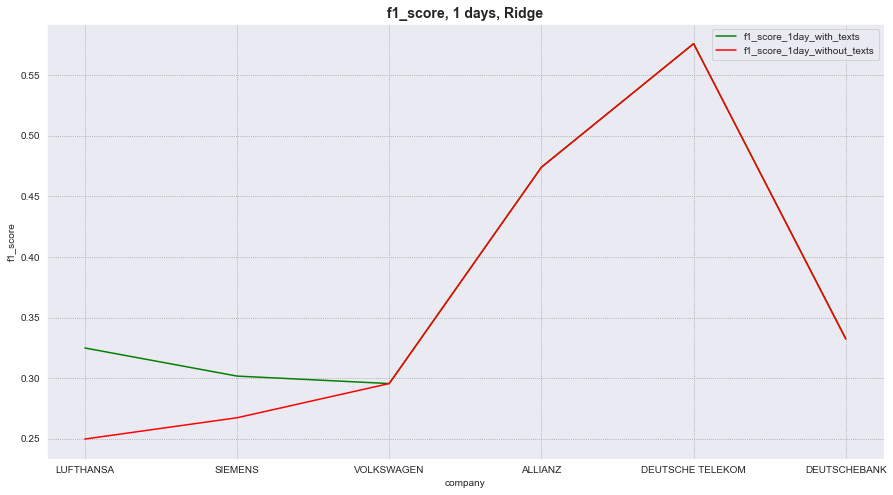

In [211]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.title('f1_score, 1 days, Ridge', weight='bold').set_fontsize('14')
metric = report[(report['period']=='1 days') & (report['model']=='Logistic Regression')]
sns.lineplot(x=report[(report['period']=='1 day') & (report['model']=='Ridge')]['company'],
             y=report[(report['period']=='1 day') & (report['model']=='Ridge')]['f1_score'], color='green', label='f1_score_1day_with_texts')
sns.lineplot(x=report_1[(report_1['period']=='1 day') & (report_1['model']=='Ridge')]['company'],
             y=report_1[(report_1['period']=='1 day') & (report_1['model']=='Ridge')]['f1_score'], color='red', label='f1_score_1day_without_texts')
plt.show()

We see that for companies with a huge number of news the sentimental column adds a predictive power